### 성별
 - 목표 : 여러 얼굴의 특성으로 성별 구분
 - 데이터셋 : gender_classification_v7
 - 피쳐/속성 : 다
 - 타겟/라벨 : gender
 - 학습 방법 : 지도학습 > 분류
 - 알고리즘 : 로지스틱 >>> 데이터 분포가 선형의 형태
 - test_size=0.2,
 - random_state=10

In [1]:
# 모듈로딩
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
pd.options.display.float_format = '{:.3f}'.format
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import pickle
import joblib

In [2]:
# 데이터 출력
file = 'gender_classification_v7.csv'
fileDF = pd.read_csv(file)

In [3]:
fileDF.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.800,6.100,1,0,1,1,Male
1,0,14.000,5.400,0,0,1,0,Female
2,0,11.800,6.300,1,1,1,1,Male
3,0,14.400,6.100,0,1,1,1,Male
4,1,13.500,5.900,0,0,0,0,Female


In [4]:
fileDF.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [5]:
fileDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
fileDF['gender'].value_counts()

gender
Female    2501
Male      2500
Name: count, dtype: int64

In [7]:
# 피쳐, 타켓 설정
featureDF = fileDF.drop(['gender'],axis=1)

targetSR = fileDF['gender']

In [8]:
featureDF.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.800,6.100,1,0,1,1
1,0,14.000,5.400,0,0,1,0
2,0,11.800,6.300,1,1,1,1
3,0,14.400,6.100,0,1,1,1
4,1,13.500,5.900,0,0,0,0


In [9]:
targetSR.head()

0      Male
1    Female
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [10]:
targetSR.value_counts()

gender
Female    2501
Male      2500
Name: count, dtype: int64

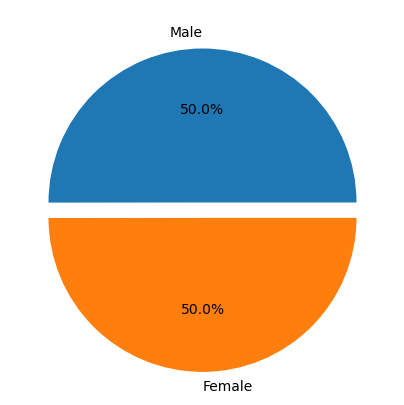

In [11]:
plt.figure(figsize = (5,5))

labels = ["Male","Female"]
explode = [0, 0.1]

plt.pie(targetSR.value_counts(), labels = labels, explode = explode, autopct = '%1.1f%%')

plt.show()

In [12]:
targetSR = targetSR.replace({'Female':1 , 'Male':0})
targetSR

0       0
1       1
2       0
3       0
4       1
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: gender, Length: 5001, dtype: int64

In [13]:
# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    stratify=targetSR,
                                                    test_size=0.2,
                                                    random_state=10)

피쳐

'long_hair'    
'forehead_width_cm', > 스케일링 진행    
'forehead_height_cm', > 스케일리 진행    
'nose_wide',     
'nose_long',    
'lips_thin',    
'distance_nose_to_lip_long'    

나머지는 0,1과 나눠서

In [14]:
# 스케일러 모델 인스턴스
mm = MinMaxScaler()
ss = StandardScaler()

mm.fit(X_train[['forehead_width_cm', 'forehead_height_cm']])
ss.fit(X_train[['forehead_width_cm', 'forehead_height_cm']])

StandardScaler()

In [33]:
joblib.dump(mm, 'mm_scaler_model.pkl')

['mm_scaler_model.pkl']

In [15]:
X_train_mm_scaled = mm.transform(X_train[['forehead_width_cm', 'forehead_height_cm']])
X_test_mm_scaled = mm.transform(X_test[['forehead_width_cm', 'forehead_height_cm']])

X_train_ss_scaled = ss.transform(X_train[['forehead_width_cm', 'forehead_height_cm']])
X_test_ss_scaled = ss.transform(X_test[['forehead_width_cm', 'forehead_height_cm']])

In [16]:
X_train_mm = X_train.copy()
X_test_mm = X_test.copy()

X_train_ss = X_train.copy()
X_test_ss = X_test.copy()

In [17]:
X_train_mm[['forehead_width_cm', 'forehead_height_cm']] = X_train_mm_scaled
X_test_mm[['forehead_width_cm', 'forehead_height_cm']] = X_test_mm_scaled

X_train_ss[['forehead_width_cm', 'forehead_height_cm']] = X_train_ss_scaled
X_test_ss[['forehead_width_cm', 'forehead_height_cm']] = X_test_ss_scaled

-----------------------------------------

In [18]:
# MinMaxScaler() 스케일링한거 진행 진행
lr = LogisticRegression()
lr.fit(X_train_mm, y_train)

LogisticRegression()

In [19]:
print(f'classes_ : {lr.classes_} , {len(lr.classes_)}개')
print(f'n_features_in_ : {lr.n_features_in_}')
print(f'n_iter_ : {lr.n_iter_}') 
print(f'coef_ : {lr.coef_}, {len(lr.coef_[0])}개')
print(f'intercept_ : {lr.intercept_}')

classes_ : [0 1] , 2개
n_features_in_ : 7
n_iter_ : [19]
coef_ : [[ 0.4501992  -2.47261587 -1.71935837 -3.66325439 -3.51315296 -3.37350603
  -3.59468338]], 7개
intercept_ : [8.36704065]


In [20]:
train_score = lr.score(X_train_mm, y_train)
test_score = lr.score(X_test_mm, y_test)
print(f'train_score : {train_score},   test_score : {test_score}')

train_score : 0.9695,   test_score : 0.962037962037962


In [21]:
y_pred = lr.predict(X_train_mm)

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_pred))


Confusion Matrix:
[[1942   58]
 [  64 1936]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2000
           1       0.97      0.97      0.97      2000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [22]:
y_pred = lr.predict(X_test_mm)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[481  19]
 [ 19 482]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       500
           1       0.96      0.96      0.96       501

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



In [23]:
# # logit(함수)

# def logit(X_train_mm,X_test, y_train, y_test):
#     lr = LogisticRegression()
#     lr.fit(X_train_mm, y_train)
#     print(f'n_iter_ : {lr.n_iter_}') 
#     print(f'coef_ : {lr.coef_}, {len(lr.coef_[0])}개')
#     print(f'intercept_ : {lr.intercept_}')
#     train_score = lr.score(X_train_mm, y_train)
# test_score = lr.score(X_test_mm, y_test)
# print(f'train_score : {train_score},   test_score : {test_score}')

# y_pred = lr.predict(X_train_mm)

# print("Confusion Matrix:")
# print(confusion_matrix(y_train, y_pred))
# print("\nClassification Report:")
# print(classification_report(y_train, y_pred))

# y_pred = lr.predict(X_train_mm)

# print("Confusion Matrix:")
# print(confusion_matrix(y_train, y_pred))
# print("\nClassification Report:")
# print(classification_report(y_train, y_pred))

In [24]:
# GridSearchCV()사용

params = {'C': [0.01,0.1,1,2,5], 
        'max_iter' : [50, 100, 150, 200, 250, 300],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

gscv = GridSearchCV(LogisticRegression(),
                    param_grid=params,
                    return_train_score=True, refit=True)
gscv.fit(X_train_mm, y_train)

print(f'[ gscv.best_params_ ] {gscv.best_params_}')
print(f'[ gscv.best_score_ ] {gscv.best_score_}')
print(f'[ gscv.best_estimator_ ] {gscv.best_estimator_}')

[ gscv.best_params_ ] {'C': 0.01, 'max_iter': 50, 'solver': 'lbfgs'}
[ gscv.best_score_ ] 0.97
[ gscv.best_estimator_ ] LogisticRegression(C=0.01, max_iter=50)


In [25]:
gscv.score(X_test_mm, y_test)

0.961038961038961

In [26]:
# # Gridlogit() 함수
# def Gridlogit()
#     params = {'C': [0.01,0.1,1,2,5], 
#         'max_iter' : [50, 100, 150, 200, 250, 300],
#         'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

# gscv = GridSearchCV(LogisticRegression(),
#                     param_grid=params,
#                     return_train_score=True, refit=True)
# gscv.fit(X_train_mm, y_train)

# print(f'[ gscv.best_params_ ] {gscv.best_params_}')
# print(f'[ gscv.best_score_ ] {gscv.best_score_}')
# print(f'[ gscv.best_estimator_ ] {gscv.best_estimator_}')

In [27]:
# roc 커브, auc 넓이 계산
y_probs1 = gscv.predict_proba(X_test_mm)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)
roc_auc1 = auc(fpr1, tpr1)
roc_auc1

0.9955329341317366

In [28]:
y_probs = gscv.predict_proba(X_train_mm)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

0.996669875

In [30]:
joblib.dump(gscv, 'filename.pkl')

['filename.pkl']

In [31]:
a=joblib.load('filename.pkl')

In [32]:
print(a)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 2, 5],
                         'max_iter': [50, 100, 150, 200, 250, 300],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             return_train_score=True)


In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'train ROC curve (AUC = {roc_auc:.2f})')
plt.plot(fpr1, tpr1, color='green', lw=2, label=f'test ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC curve_mm')
plt.legend(loc="lower right")
plt.show()

In [30]:
# from sklearn.model_selection import cross_validate
# from sklearn.linear_model import Ridge, Lasso # 지금은 이거 할 필요 X

-------------------------------------------------

In [ ]:
### StandardScaler로 진행

lr_ss = LogisticRegression()
lr_ss.fit(X_train_ss, y_train)

In [ ]:
print(f'classes_ : {lr_ss.classes_} , {len(lr_ss.classes_)}개')
print(f'n_features_in_ : {lr_ss.n_features_in_}')
print(f'n_iter_ : {lr_ss.n_iter_}')
print(f'coef_ : {lr_ss.coef_}, {len(lr_ss.coef_[0])}개')
print(f'intercept_ : {lr_ss.intercept_}')

In [ ]:
train_score_ss = lr_ss.score(X_train_ss, y_train)
test_score_ss = lr_ss.score(X_test_ss, y_test)
print(f'train_score : {train_score_ss},   test_score : {test_score_ss}')

In [ ]:
y_pred = lr_ss.predict(X_train_ss)

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_pred))


In [ ]:
y_pred = lr_ss.predict(X_test_ss)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# GridSearchCV()사용

params = {'C': [0.1,1,2,5,10], 
        'max_iter' : [50, 100, 150, 200, 250, 300],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

gscv_ss = GridSearchCV(LogisticRegression(),
                    param_grid=params,
                    return_train_score=True, refit=True)
gscv_ss.fit(X_train_ss, y_train)

print(f'[ gscv.best_params_ ] {gscv_ss.best_params_}')
print(f'[ gscv.best_score_ ] {gscv_ss.best_score_}')
print(f'[ gscv.best_estimator_ ] {gscv_ss.best_estimator_}')

In [ ]:
gscv_ss.score(X_test_ss, y_test)

In [ ]:
# roc 커브, auc 계산
y_probs1 = gscv_ss.predict_proba(X_test_ss)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs1)
roc_auc_ss1 = auc(fpr1, tpr1)
roc_auc_ss1

In [ ]:
y_probs = gscv.predict_proba(X_train_ss)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
roc_auc_ss = auc(fpr, tpr)
roc_auc_ss

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'train ROC curve (AUC = {roc_auc_ss:.2f})')
plt.plot(fpr1, tpr1, color='green', lw=2, label=f'test ROC curve (AUC = {roc_auc_ss1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC curve_ss')
plt.legend(loc="lower right")
plt.show()

In [41]:
# alpha_values = [0., 1., 10, 100]

# # Ridge
# for value in alpha_values:
#     ridge_model = Ridge(alpha=value) # 기본값 : 1.0# 학습진행
#     # - cv : 3개
#     # - scoring: 'mean_squared_error, 'r2'
#     # - return_train_score
#     result = cross_validate(ridge_model,
#                             X_train_ss, y_train,
#                             cv=3,
#                             scoring=['neg_mean_squared_error','r2'],
#                             return_train_score=True,
#                             return_estimator = True)

#     resultDF=pd.DataFrame(result)[['train_r2','test_r2']]
    
#     resultDF['diff'] = abs(resultDF['train_r2'])- resultDF['test_r2']
    
#     print(result['estimator'][0].coef_)
#     print(f'[Ridge(alpha = {value})]')
#     print(resultDF, end= '\n\n')

In [42]:
# # Lasso

# for value in alpha_values:
#     lasso_model = Lasso(alpha=value, max_iter=3) 
#     # - cv : 3개
#     # - scoring: 'mean_squared_error, 'r2'
#     # - return_train_score
#     result = cross_validate(lasso_model,
#                             X_train_ss, y_train,
#                             cv=3,
#                             scoring=['neg_mean_squared_error','r2'],
#                             return_train_score=True,
#                             return_estimator = True)
    
#     resultDF=pd.DataFrame(result)[['train_r2','test_r2']]
    
#     resultDF['diff'] = abs(resultDF['test_r2'])- resultDF['test_r2']
    
#     print(result['estimator'][0].coef_)
#     print(f'[Lasso(alpha = {value})]')
#     print(resultDF, end= '\n\n')

---------------------------------------------

In [ ]:
### 스케일링 전 데이터로 진행

lr_n = LogisticRegression()
lr_n.fit(X_train, y_train)

In [ ]:
print(f'classes_ : {lr_n.classes_} , {len(lr_n.classes_)}개')
print(f'n_features_in_ : {lr_n.n_features_in_}')
print(f'n_iter_ : {lr_n.n_iter_}')
print(f'coef_ : {lr_n.coef_}, {len(lr_n.coef_[0])}개')
print(f'intercept_ : {lr_n.intercept_}')

In [ ]:
train_score_n = lr_n.score(X_train, y_train)
test_score_n = lr_n.score(X_test, y_test)
print(f'train_score : {train_score},   test_score : {test_score}')

In [ ]:
y_pred = lr_n.predict(X_train)

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_pred))


In [ ]:
y_pred = lr_n.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# GridSearchCV

params = {'C': [0.1,1,2,5,10], # 알파의 역수
        'max_iter' : [50, 100, 150, 200, 250, 300],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

gscv_n = GridSearchCV(LogisticRegression(),
                    param_grid=params,
                    return_train_score=True, refit=True)
gscv_n.fit(X_train, y_train)

print(f'[ gscv.best_params_ ] {gscv_n.best_params_}')
print(f'[ gscv.best_score_ ] {gscv_n.best_score_}')
print(f'[ gscv.best_estimator_ ] {gscv_n.best_estimator_}')

In [ ]:
gscv_n.score(X_test, y_test)

In [ ]:
# roc 커브, auc 계산
y_probs1 = gscv_n.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs1)
roc_auc_n1 = auc(fpr1, tpr1)
roc_auc_n1

In [ ]:
y_probs = gscv.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
roc_auc_n = auc(fpr, tpr)
roc_auc_n

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'train ROC curve (AUC = {roc_auc_n:.2f})')
plt.plot(fpr1, tpr1, color='green', lw=2, label=f'test ROC curve (AUC = {roc_auc_n1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC curve_n')
plt.legend(loc="lower right")
plt.show()

#### 최적의 변수 , 다 살펴보고 정밀도 민감도 젤 좋은 모델을 뽑는 과정

>> 최적화 >> 변수는 줄이고 점수는 높은것을 찾아    
>>>> 7개 변수중에서 직관적인 변수 찾아서 ex)상관계수라던지 그러그런       

In [53]:
# 4개 넣었을때
new_X_train_mm = X_train_mm.loc[:, ['distance_nose_to_lip_long', 'forehead_width_cm', 'nose_wide', 'lips_thin']]
new_X_test_mm = X_test_mm.loc[:, ['distance_nose_to_lip_long', 'forehead_width_cm', 'nose_wide', 'lips_thin']]

In [ ]:
lr_new = LogisticRegression()
lr_new.fit(new_X_train_mm, y_train)

In [ ]:
print(f'classes_ : {lr_new.classes_} , {len(lr_new.classes_)}개')
print(f'n_features_in_ : {lr_new.n_features_in_}')
print(f'n_iter_ : {lr_new.n_iter_}')
print(f'coef_ : {lr_new.coef_}, {len(lr_new.coef_[0])}개')
print(f'intercept_ : {lr_new.intercept_}')

In [ ]:
train_score_new = lr_new.score(new_X_train_mm, y_train)
test_score_new = lr_new.score(new_X_test_mm, y_test)
print(f'train_score : {train_score_new},   test_score : {test_score_new}')

In [ ]:
y_pred = lr_new.predict(new_X_train_mm)

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_pred))

In [ ]:
y_pred = lr_new.predict(new_X_test_mm)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# GridSearchCV

params = {'C': [0.1,1,2,5,10], # 알파의 역수
        'max_iter' : [50, 100, 150, 200, 250, 300],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

gscv_new = GridSearchCV(LogisticRegression(),
                    param_grid=params,
                    return_train_score=True, refit=True)
gscv_new.fit(new_X_train_mm, y_train)

print(f'[ gscv.best_params_ ] {gscv_new.best_params_}')
print(f'[ gscv.best_score_ ] {gscv_new.best_score_}')
print(f'[ gscv.best_estimator_ ] {gscv_new.best_estimator_}')

In [ ]:
# roc 커브, auc 계산

y_probs = gscv_new.predict_proba(new_X_test_mm)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc_new = auc(fpr, tpr)
roc_auc_new, fpr, tpr, y_probs

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_new:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC curve_n')
plt.legend(loc="lower right")
plt.show()